In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
images_dir = "train/"

In [3]:
def get_sizes(data_folder, sample_size):
    widths = []
    heights = []
    image_filenames = os.listdir(data_folder)
    image_sample = random.sample(image_filenames, sample_size)
    for image_filename in image_sample:
        image_path = os.path.join(data_folder, image_filename)
        image = Image.open(image_path)
        width, height = image.size
        widths.append(width)
        heights.append(height)
    return widths, heights    

In [6]:
widths, heights = get_sizes(images_dir, 25000)

In [7]:
wd = pd.DataFrame(widths, columns=['Widths'])
wd.describe()

,Widths
count,25000.00000
mean,404.09904
std,109.03793
min,42.00000
25%,323.00000
50%,447.00000
75%,499.00000
max,1050.00000


In [8]:
wd = pd.DataFrame(heights, columns=['Heights'])
wd.describe()

,Heights
count,25000.000000
mean,360.478080
std,97.019959
min,32.000000
25%,301.000000
50%,374.000000
75%,421.000000
max,768.000000


In [3]:
import matplotlib.pyplot as plt
import cv2

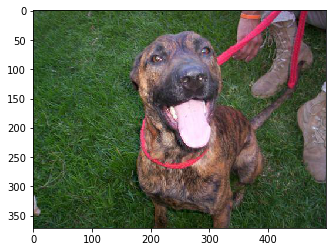

In [4]:
img = Image.open('train/dog.12224.jpg')
plt.imshow(img)
plt.show()

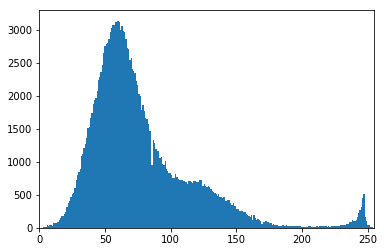

In [5]:
im = cv2.imread('train/dog.12224.jpg')
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

In [6]:
#Histogram Equalization for collor images
img = cv2.imread('train/dog.12224.jpg')


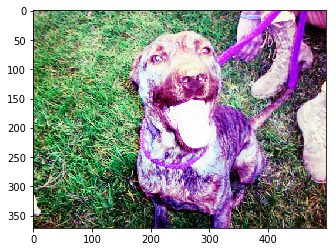

In [7]:
img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
plt.imshow(img)
plt.show()

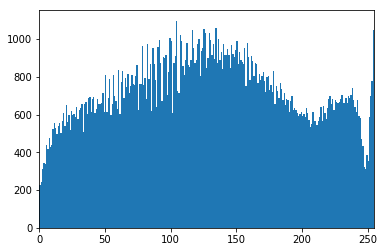

In [8]:
vals = img.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

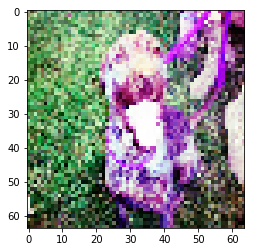

In [9]:
img_width = 64
img_height = 64
img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
plt.imshow(img)
plt.show()

In [19]:
def transform_images(img, width, height):
    img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
    return img

In [20]:
def make_train_set(data_folder, train_dir):
    img_width = 256
    img_height = 256
    image_label = 0
    image_filenames = os.listdir(data_folder)
    for image_filename in image_filenames:
        image_path = os.path.join(data_folder, image_filename)
        img = cv2.imread(image_path)
        img = transform_images(img, img_width, img_height)
        cv2.imwrite(str(train_dir)+"/"+ str(os.path.basename(image_filename)), img)
    

In [21]:
make_train_set(images_dir, "train_images")